# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, on= "Mouse ID", how="left")

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_data_complete['Mouse ID'].count()

1893

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_data_complete.duplicated(['Mouse ID','Timepoint']).sum()

5

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_data_complete.duplicated(['Mouse ID'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_data_clean = mouse_data_complete.drop_duplicates(['Mouse ID'])

mouse_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.

mouse_data_clean['Mouse ID'].count()


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

mouse_data_stats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
mouse_data_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_data_aggregated = mouse_data_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem'] })
mouse_data_aggregated

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

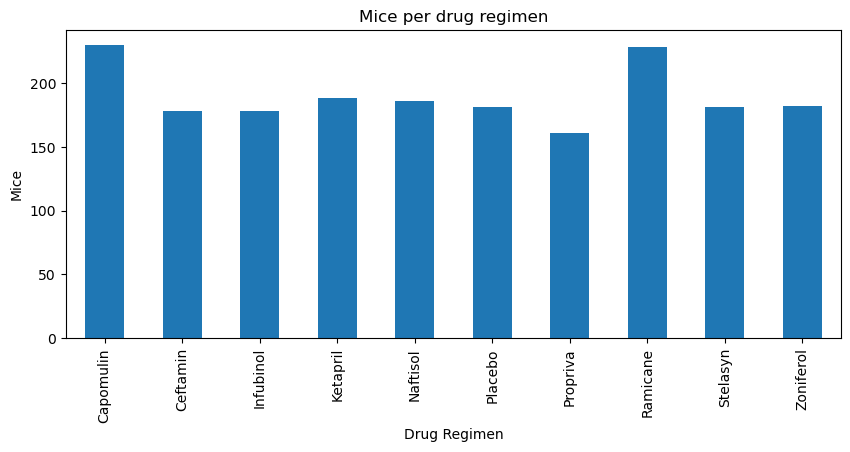

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data_complete.groupby(["Drug Regimen"]).count()["Mouse ID"].plot(kind="bar", figsize=(10,4))

plt.title("Mice per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")

plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (10, 2) + inhomogeneous part.

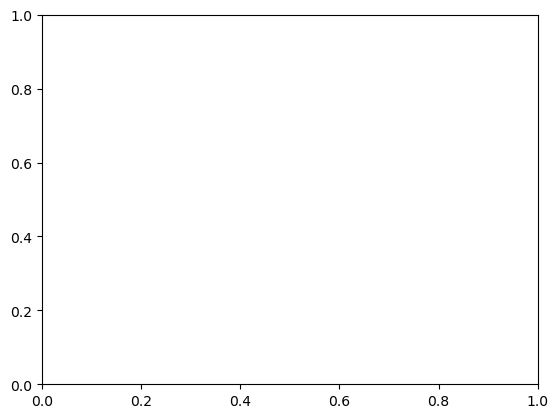

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mousedata_chart = mouse_data_complete.groupby(["Drug Regimen"])
x_axis = np.arange(len(mousedata_chart))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, mousedata_chart, color='b', alpha=1, align='center')
plt.xticks(tick_locations, mousedata_chart, rotation="vertical")
plt.ylim(0, max(mousedata_chart)+10)
plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number")
plt.legend




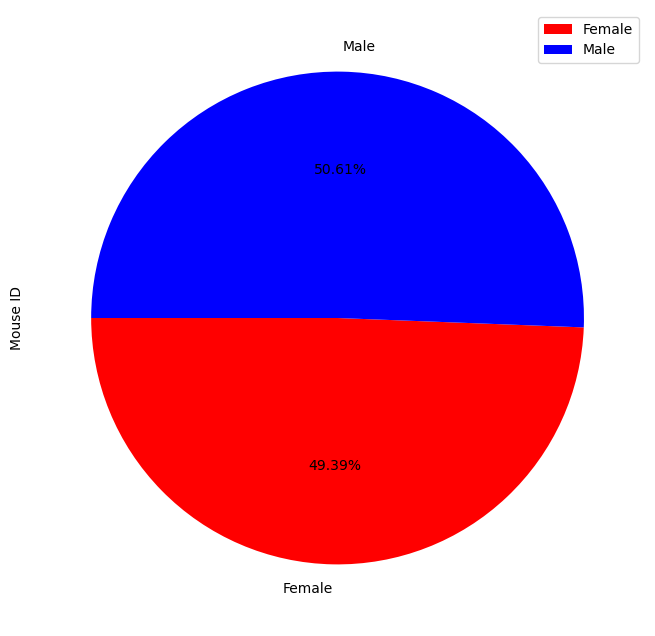

In [ ]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = mouse_data_complete.groupby(["Sex"]).count()["Mouse ID"]
gender_distribution

# Make the pie chart
colors = ['red', 'blue']
explode = (0.05, 0)
gender_pie = gender_distribution.plot.pie(y='Total Count',figsize=(8,8), colors = colors, startangle=180, autopct="%1.2f%%")
gender_pie.legend(["Female", "Male"])

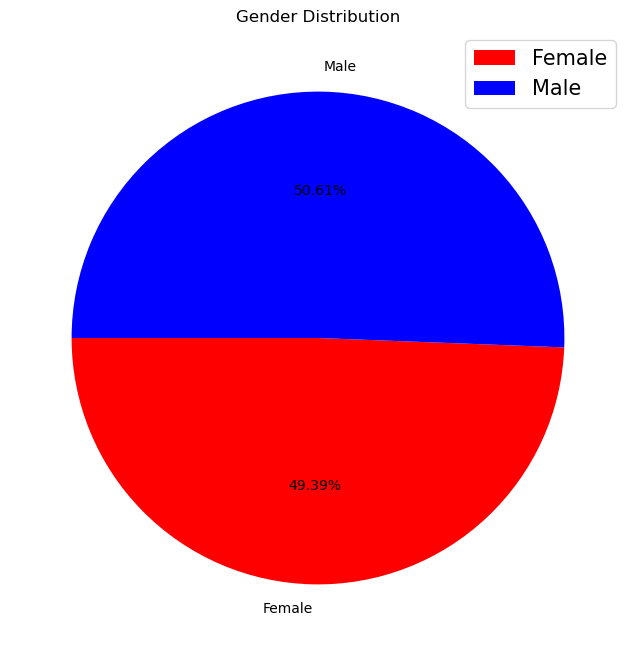

In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
colors = ['red', 'blue']
explode = (0.05, 0)
plt.pie(gender_distribution, labels=gender_distribution.index.values, colors=colors, startangle=180, autopct="%1.2f%%")
plt.legend(["Female", "Male"], prop={'size': 15})
plt.title('Gender Distribution')

# Make the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_mouse_timepoint = mouse_data_complete[mouse_data_complete["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
last_mouse_timepoint = last_mouse_timepoint.sort_values(["Timepoint"], ascending=True)
last_mouse_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_mouse_data_complete = last_mouse_timepoint.merge(mouse_data_complete, on = ('Mouse ID', 'Timepoint'), how = 'left' )
timepoint_mouse_data_complete
tumor_volume_data = timepoint_mouse_data_complete[["Drug Regimen_x", "Mouse ID", "Timepoint", "Tumor Volume (mm3)_x"]]


total_nulls = timepoint_mouse_data_complete.isnull().sum().sum()
total_nulls

0

In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in timepoint_mouse_data_complete.iterrows():
    if row["Drug Regimen_x"] == 'Capomulin':
        tumor_capomulin.append(row['Tumor Volume (mm3)_x'])
    if row["Drug Regimen_x"] == treatments[1]:
        tumor_ramicane.append(row['Tumor Volume (mm3)_x'])
    if row["Drug Regimen_x"] == treatments[2]:
        tumor_infubinol.append(row['Tumor Volume (mm3)_x'])
    if row["Drug Regimen_x"] == treatments[3]:
        tumor_ceftamin.append(row['Tumor Volume (mm3)_x'])

    # add subset



lengths = [len(array) for array in [tumor_capomulin, tumor_ceftamin, tumor_ramicane]]
print("Lengths of arrays:", lengths)

# Check if all arrays have the same length
if len(set(lengths)) == 1:
    print("All arrays have the same length.")
else:
    print("Arrays have different lengths.")

treatment_df = pd.DataFrame({treatments[0]: tumor_capomulin,
                       treatments[1]: tumor_ramicane,
                       treatments[2]: tumor_infubinol,
                       treatments[3]: tumor_ceftamin
                       })

    # Determine outliers using upper and lower bounds
treatment_df_max = treatment_df.max()
treatment_df_min = treatment_df.min()
treatment_df

Lengths of arrays: [230, 178, 228]
Arrays have different lengths.


ValueError: All arrays must be of the same length

In [25]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxplot_chart = []
for treatment in treatment_df:
    boxplot_chart.append(list(last_mouse_timepoint[treatment].dropna()))
    
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], treatment_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_chart)
plt.show()

NameError: name 'treatment_df' is not defined

## Line and Scatter Plots

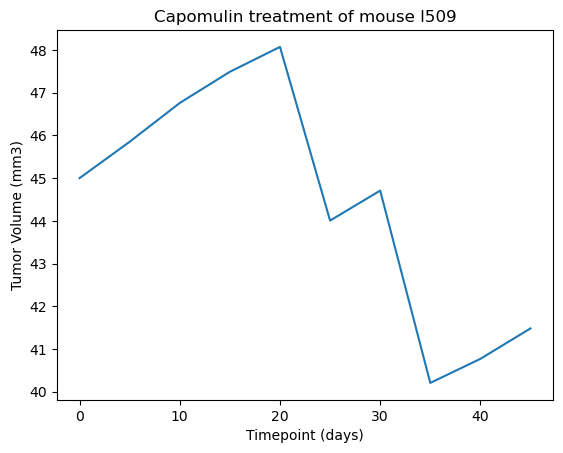

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


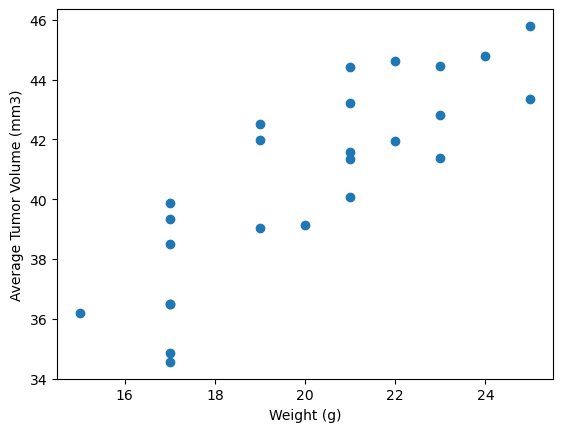

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


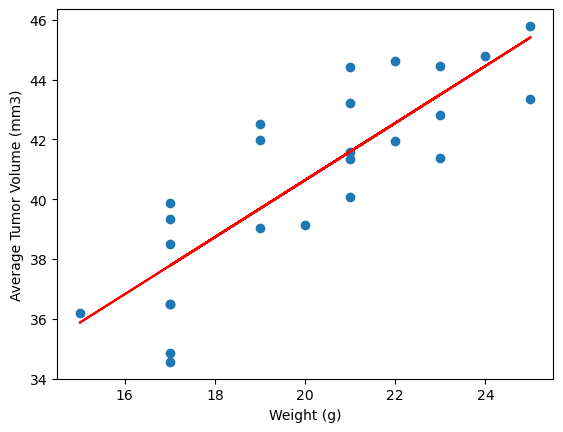

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
